In [ ]:
!pip install hpelm
!pip install hpelm scikit-learn pandas openpyxl matplotlib

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from hpelm import ELM
import numpy as np

In [ ]:
# 1. Load Data
file_path = "/content/Data New.xlsx"
df = pd.read_excel(file_path, header = 3)

In [ ]:
# 2. Cek kolom
print(df)

# Misal kolomnya: ['Jenis Kelamin', 'Umur', 'Berat Badan', 'Tekanan Darah', 'Denyut Nadi', 'Frekuensi Napas', 'Jenis Nyeri Dada', 'Kelas']

      No  Umur  Jenis Kelamin  Nyeri Dada Saat Beraktivitas  Tekanan Darah  \
0      1    37              2                             3            130   
1      2    41              1                             2            130   
2      3    56              2                             2            120   
3      4    57              1                             4            120   
4      5    57              2                             4            140   
..   ...   ...            ...                           ...            ...   
228  229    64              2                             4            145   
229  230    65              2                             4            136   
230  231    76              2                             3            104   
231  232    62              2                             4            130   
232  233    62              2                             4            160   

     Kadar Kolesterol  Gula Darah  Hasil Uji EKG  Denyut Jantun

In [ ]:
df['jenis_kelamin'] = df['Jenis Kelamin'].replace({1: 0, 2: 1})

In [ ]:
# 4. Feature - Target
X = df[['Umur', 'Jenis Kelamin', 'Nyeri Dada Saat Beraktivitas', 'Tekanan Darah', 'Kadar Kolesterol', 'Gula Darah', 'Hasil Uji EKG', 'Denyut Jantung', 'Sakit Dada Selama Beraktivitas', 'Atribut Hasil Prediksi Penyakit Jantung']]
y = df['Prediksi']

In [ ]:
# 5. Standardisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# 6. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 7. One-hot encoding target
onehot = OneHotEncoder(sparse_output=False)
y_train_oh = onehot.fit_transform(y_train.values.reshape(-1, 1))

In [ ]:
# 8. Latih model ELM
elm = ELM(X_train.shape[1], len(set(y)), classification="c")
elm.add_neurons(100, "sigm")
elm.train(X_train, y_train_oh)

In [ ]:
# 9. Prediksi & evaluasi
y_pred = elm.predict(X_test).argmax(axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.56      0.62        25
           1       0.38      0.53      0.44        15
           2       0.00      0.00      0.00         1
           3       0.25      0.20      0.22         5
           4       0.00      0.00      0.00         1

    accuracy                           0.49        47
   macro avg       0.27      0.26      0.26        47
weighted avg       0.52      0.49      0.50        47



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


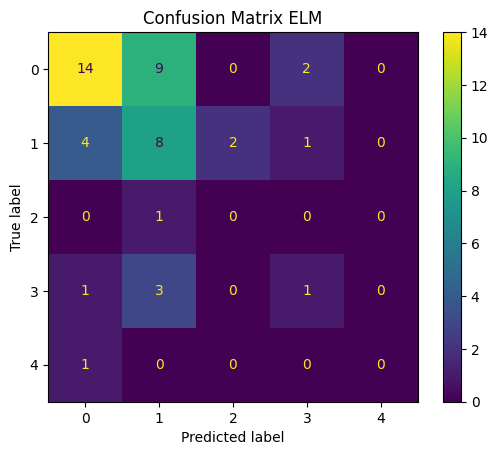

In [ ]:
# 10. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix ELM")
plt.show()

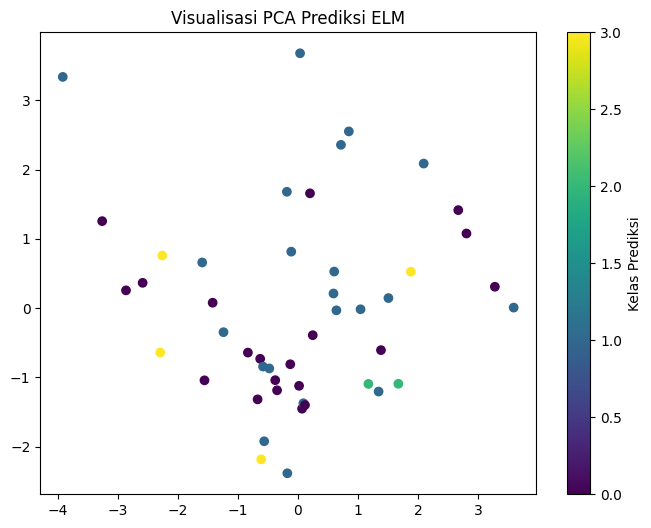

In [ ]:
# 11. Visualisasi PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='viridis')
plt.title("Visualisasi PCA Prediksi ELM")
plt.colorbar(label='Kelas Prediksi')
plt.show()

Covariance matrix is not full rank; solving with SVD (slow)
This happened because you have duplicated or too many neurons
Covariance matrix is not full rank; solving with SVD (slow)
This happened because you have duplicated or too many neurons


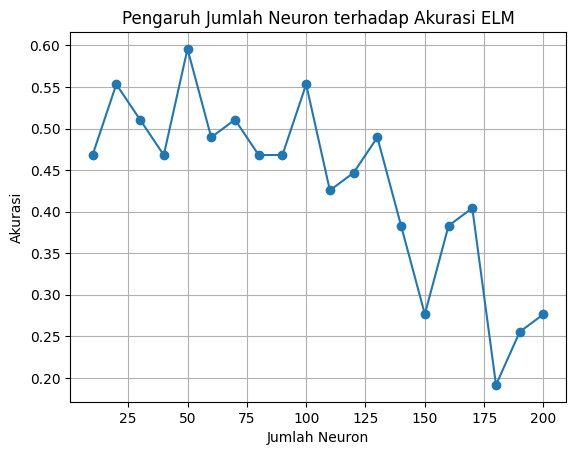

In [ ]:
# 12. Grafik Akurasi vs Jumlah Neuron
accuracies = []
neuron_counts = range(10, 201, 10)

for n in neuron_counts:
    elm_loop = ELM(X_train.shape[1], len(set(y)), classification="c")
    elm_loop.add_neurons(n, "sigm")
    elm_loop.train(X_train, y_train_oh)
    y_pred_loop = elm_loop.predict(X_test).argmax(axis=1)
    acc = (y_pred_loop == y_test).mean()
    accuracies.append(acc)

plt.plot(neuron_counts, accuracies, marker='o')
plt.xlabel("Jumlah Neuron")
plt.ylabel("Akurasi")
plt.title("Pengaruh Jumlah Neuron terhadap Akurasi ELM")
plt.grid(True)
plt.show()

PART II

In [ ]:
# install library
!pip install hpelm
!pip install hpelm scikit-learn pandas openpyxl matplotlib
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 88.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from hpelm import ELM
import joblib

In [ ]:
# 1. Load & preprocess data
file_path = "/content/Data New.xlsx"
df = pd.read_excel(file_path, header = 3).dropna()

In [ ]:
# Rename kolom sesuai kebutuhan...
df.columns = [
    "No","Umur","Jenis Kelamin","Nyeri Dada","Tekanan Darah","Kolesterol",
    "Gula Darah","Hasil EKG","Detak Jantung", "Sakit Dada Selama Beraktivitas",
    "Atribut Hasil Prediksi Penyakit Jantung", "Hasil"
]

In [ ]:
# 2. Cek kolom
print(df)

      No  Umur  Jenis Kelamin  Nyeri Dada  Tekanan Darah  Kolesterol  \
0      1    37              2           3            130         250   
1      2    41              1           2            130         204   
2      3    56              2           2            120         236   
3      4    57              1           4            120         354   
4      5    57              2           4            140         192   
..   ...   ...            ...         ...            ...         ...   
228  229    64              2           4            145         212   
229  230    65              2           4            136         248   
230  231    76              2           3            104         223   
231  232    62              2           4            130         170   
232  233    62              2           4            160         254   

     Gula Darah  Hasil EKG  Detak Jantung  Sakit Dada Selama Beraktivitas  \
0             0          0            187                 

In [ ]:
# 3. Buang kolom 'No' karena bukan fitur prediktif
df = df.drop(columns=["No"])

In [ ]:
print(df)

     Umur  Jenis Kelamin  Nyeri Dada  Tekanan Darah  Kolesterol  Gula Darah  \
0      37              2           3            130         250           0   
1      41              1           2            130         204           0   
2      56              2           2            120         236           0   
3      57              1           4            120         354           0   
4      57              2           4            140         192           0   
..    ...            ...         ...            ...         ...         ...   
228    64              2           4            145         212           0   
229    65              2           4            136         248           0   
230    76              2           3            104         223           0   
231    62              2           4            130         170           0   
232    62              2           4            160         254           1   

     Hasil EKG  Detak Jantung  Sakit Dada Selama Be

In [ ]:
# 3. Preprocess data
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace({1: 0, 2: 1})

In [ ]:
# 4. Fitur & target
X = df.drop(columns=["Hasil"])
y = df["Hasil"]

In [ ]:
# 5. Jika target bukan numerik, encode ke angka
if y.dtype == object:
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    joblib.dump(label_encoder, "label_encoder.pkl")  # Optional: Simpan label encoder jika dibutuhkan nanti

In [ ]:
# 6. Split data (hindari data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 7. Standarisasi fitur
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 8. One-hot encode target untuk ELM
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

In [ ]:
# 9. Buat dan latih model ELM
elm = ELM(X_train_scaled.shape[1], y_train_encoded.shape[1], classification="c")
elm.add_neurons(100, "sigm")  # Jumlah neuron tersembunyi & fungsi aktivasi
elm.train(X_train_scaled, y_train_encoded)

In [ ]:
# 10. Prediksi dan evaluasi
y_pred = elm.predict(X_test_scaled).argmax(axis=1)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi: 0.38571428571428573

Laporan klasifikasi:
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        38
           1       0.22      0.18      0.20        22
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.39        70
   macro avg       0.17      0.16      0.16        70
weighted avg       0.40      0.39      0.39        70



In [ ]:
# 11. Simpan model, scaler, encoder
elm.save("elm_model.h5") # Save model using elm.save()
joblib.dump(scaler, "scaler.pkl")
joblib.dump(encoder, "encoder.pkl")

['encoder.pkl']

In [ ]:
# 8. Cetak versi modul
import sklearn
import sys
print("\nModel & tools disimpan.")
print("Versi numpy:", np.__version__)
print("Versi scikit-learn:", sklearn.__version__)
print("Versi joblib:", joblib.__version__)
print("Versi Python:", sys.version)


Model & tools disimpan.
Versi numpy: 1.23.5
Versi scikit-learn: 1.6.1
Versi joblib: 1.4.2
Versi Python: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
